In [3]:
from qiskit import *
qubits = QuantumRegister(120)
clbits = ClassicalRegister(120)
circuit = QuantumCircuit(qubits, clbits)
 
#q0, q1, q2, q3, q4, q5, q6, q7 = qubits
#c0, c1, c2, c3, c4, c5, c6, c7 = clbits
circuit.x(0)
#circuit.barrier()
circuit.h(1)
for i in range(118):
        circuit.cx(i+1, i+2)
circuit.barrier()
#circuit.draw('latex')



CircuitInstruction(operation=Instruction(name='barrier', num_qubits=120, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(120, 'q2'), 0), Qubit(QuantumRegister(120, 'q2'), 1), Qubit(QuantumRegister(120, 'q2'), 2), Qubit(QuantumRegister(120, 'q2'), 3), Qubit(QuantumRegister(120, 'q2'), 4), Qubit(QuantumRegister(120, 'q2'), 5), Qubit(QuantumRegister(120, 'q2'), 6), Qubit(QuantumRegister(120, 'q2'), 7), Qubit(QuantumRegister(120, 'q2'), 8), Qubit(QuantumRegister(120, 'q2'), 9), Qubit(QuantumRegister(120, 'q2'), 10), Qubit(QuantumRegister(120, 'q2'), 11), Qubit(QuantumRegister(120, 'q2'), 12), Qubit(QuantumRegister(120, 'q2'), 13), Qubit(QuantumRegister(120, 'q2'), 14), Qubit(QuantumRegister(120, 'q2'), 15), Qubit(QuantumRegister(120, 'q2'), 16), Qubit(QuantumRegister(120, 'q2'), 17), Qubit(QuantumRegister(120, 'q2'), 18), Qubit(QuantumRegister(120, 'q2'), 19), Qubit(QuantumRegister(120, 'q2'), 20), Qubit(QuantumRegister(120, 'q2'), 21), Qubit(QuantumRegister(120, 'q2'), 22), Qubit(

In [4]:
circuit.depth() # For every 'n' qubits, it gives out the depth has '(n+1)'

119

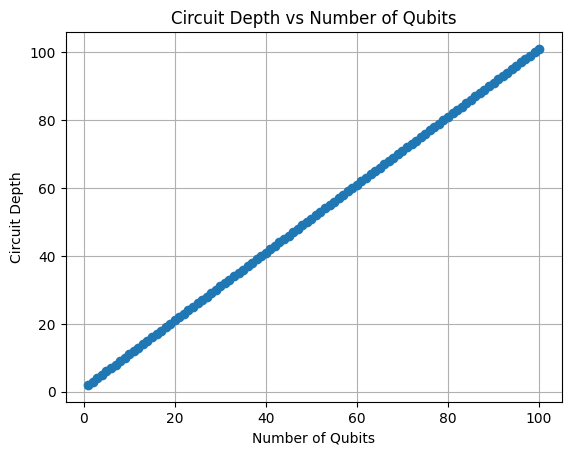

In [8]:
import matplotlib.pyplot as plt

# Define the function to calculate circuit depth based on the number of qubits
def calculate_circuit_depth(qubits):
    return qubits + 1

# Generate values for qubits from 1 to 100
qubits_values = list(range(1, 5))

# Calculate corresponding circuit depths
circuit_depths = [calculate_circuit_depth(qubits) for qubits in qubits_values]

# Plot the line graph
plt.plot(qubits_values, circuit_depths, marker='o', linestyle='-')
plt.title('Circuit Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Circuit Depth')
plt.grid(True)
plt.show()


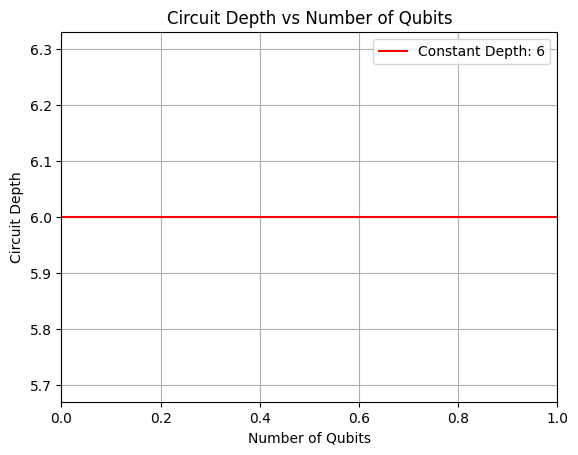

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constant circuit depth
constant_depth = 6

# Generate values for qubits from 1 to 100 (though it doesn't affect the plot)
qubits_values = list(range(1, 101))

# Plot the horizontal line for the constant circuit depth
plt.axhline(y=constant_depth, color='r', linestyle='-', label=f'Constant Depth: {constant_depth}')

# Add legend
plt.legend()

plt.title('Circuit Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Circuit Depth')
plt.grid(True)
plt.show()


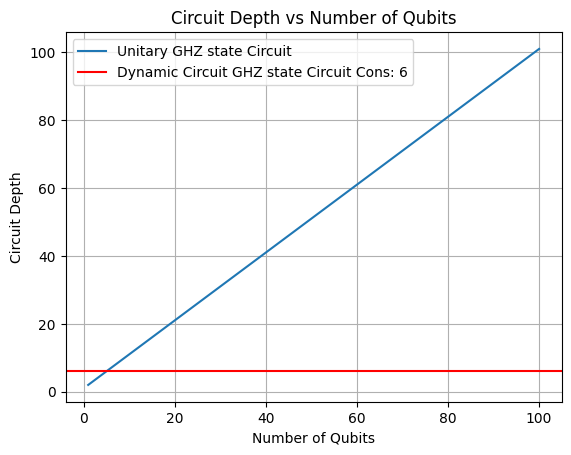

In [15]:
import matplotlib.pyplot as plt

# Define the function to calculate increasing circuit depth based on the number of qubits
def calculate_increasing_circuit_depth(qubits):
    return qubits + 1

# Define the constant circuit depth
constant_depth = 6

# Generate values for qubits from 1 to 100
qubits_values = list(range(1, 101))

# Calculate corresponding increasing circuit depths
increasing_circuit_depths = [calculate_increasing_circuit_depth(qubits) for qubits in qubits_values]

# Plot the increasing circuit depth
plt.plot(qubits_values, increasing_circuit_depths, label='Unitary GHZ state Circuit')

# Plot the horizontal line for the constant circuit depth
plt.axhline(y=constant_depth, color='r', linestyle='-', label=f'Dynamic Circuit GHZ state Circuit Cons: {constant_depth}')

# Add legend
plt.legend()

plt.title('Circuit Depth vs Number of Qubits')
plt.xlabel('Number of Qubits')
plt.ylabel('Circuit Depth')
plt.grid(True)
plt.show()


In [6]:
from qiskit import *

def create_circuit(n):
    qubits = QuantumRegister(n)
    clbits = ClassicalRegister(n)
    circuit = QuantumCircuit(qubits, clbits)
    
    for i in range(1, n, 2):
        circuit.h(qubits[i])
    
    for i in range(3, n, 2):
        circuit.cx(qubits[i], qubits[i-1])
        circuit.cx(qubits[i-2], qubits[i-1])
    
    for i in range(2, n, 3):
        circuit.measure(qubits[i], clbits[i])

    for i in range(2, n-1, 3):
        with circuit.if_test((clbits[i], 1)):
            circuit.x(qubits[i+1])
    
    for i in range(3, n, 2):
        circuit.cx(qubits[i-2], qubits[i-1])

    return circuit

# Example usage
num_qubits = 110  # Change this value for a different number of qubits
circuit = create_circuit(num_qubits)
circuit.depth()

6